# Análisis Exploratorio de Datos (EDA)

## Introducción

El análisis exploratorio de datos (EDA) es fundamental para comprender la estructura y contenido de nuestros datos antes de construir modelos. En este proyecto, buscamos desarrollar un sistema de recomendación de películas basado en dos datasets: `movies` y `credits`, que contienen detalles de películas y el elenco de cada una.

## Objetivos del EDA

1. **Comprender la estructura de los datos:** Revisar columnas, tipos de datos y primeras filas.
2. **Identificar y manejar valores nulos o anómalos:** Detectar datos faltantes y decidir su tratamiento.
3. **Visualizar la distribución de variables clave:** Analizar variables como `budget`, `revenue`, `vote_average`, `genres` y `cast`.
4. **Estudiar relaciones entre variables:** Explorar correlaciones relevantes para el sistema de recomendación.
5. **Preparar datos para el modelo:** Transformar columnas clave para facilitar el análisis de similitud.

## Estructura del EDA

1. **Carga y visualización inicial:** Exploraremos la estructura de cada dataset.
2. **Análisis univariante y de valores nulos:** Visualizaremos variables clave y revisaremos datos faltantes.
3. **Análisis de correlación:** Identificaremos relaciones entre variables numéricas.
4. **Transformación de datos:** Prepararemos columnas como `genres`, `cast` y `production_companies` para el modelo de recomendación.

---


## 1) Carga y Visualización Inicial de los Datos

En esta sección, cargaremos los datasets y realizaremos una inspección básica para entender la estructura de los datos.

1. **Cargar los datos**: Usamos `pd.read_parquet` para leer los archivos `movies.parquet` y `credits.parquet`.
2. **Visualización inicial**: Observaremos las primeras filas, nombres de columnas y tipos de datos.
3. **Análisis de la dimensión de los datasets**: Evaluaremos el tamaño de los datasets para entender la cantidad de información con la que estamos trabajando.


In [ ]:
import os

# Cambio al directorio raíz del proyecto
os.chdir(r'C:\Users\Usuario\Desktop\DATA SCIENCE\PROYECTO ML')

# vemos el cambio de directorio
print("Directorio actual después de cambiar:", os.getcwd())


Directorio actual después de cambiar: C:\Users\Usuario\Desktop\DATA SCIENCE\PROYECTO ML


In [ ]:
# Importamos librerías necesarias
import pandas as pd

# se cargan los datos desde la ubicación de los archivos .parquet generados en el ETL
movies = pd.read_parquet('Data/processed_data/movies_dataset.parquet')
credits = pd.read_parquet('Data/processed_data/credits.parquet')

# Visualizamos las primeras filas de cada dataset
print("Primeras filas del dataset movies:")
display(movies.head())

print("\nPrimeras filas del dataset credits:")
display(credits.head())

# vemos la información básica sobre cada dataset
print("\nInformación del dataset movies:")
movies.info()

print("\nInformación del dataset credits:")
credits.info()

# dimensión de los datasets
print(f"\nDimensiones del dataset movies: {movies.shape}")
print(f"Dimensiones del dataset credits: {credits.shape}")


Primeras filas del dataset movies:


,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,status,tagline,title,vote_average,vote_count,release_year,return,overview_clean,mes_estreno,dia_estreno
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,21.946943,Pixar Animation Studios,USA,1995-10-30,373554033.0,...,Released,None,Toy Story,7.7,5415,1995,12.451801,led woody andys toys live happily room andys b...,Octubre,Lunes
1,None,65000000,"Adventure, Family, Fantasy",8844,en,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",USA,1995-12-15,262797249.0,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,1995,4.043035,siblings judy peter discover enchanted board g...,Diciembre,Viernes
2,Grumpy Old Men Collection,0,"Comedy, Romance",15602,en,11.7129,"Warner Bros., Lancaster Gate",USA,1995-12-22,0.0,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92,1995,0.000000,family wedding reignites ancient feud nextdoor...,Diciembre,Viernes
3,None,16000000,"Comedy, Drama, Romance",31357,en,3.859495,Twentieth Century Fox Film Corporation,USA,1995-12-22,81452156.0,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34,1995,5.090760,cheated mistreated stepped women holding breat...,Diciembre,Viernes
4,Father of the Bride Collection,0,Comedy,11862,en,8.387519,"Sandollar Productions, Touchstone Pictures",USA,1995-02-10,76578911.0,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173,1995,0.000000,just george banks recovered daughters wedding ...,Febrero,Viernes



Primeras filas del dataset credits:


,id,cast_names,director_names
0,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer



Información del dataset movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  2655 non-null   object        
 1   budget                 25000 non-null  int64         
 2   genres                 25000 non-null  category      
 3   id                     25000 non-null  object        
 4   original_language      24998 non-null  object        
 5   popularity             25000 non-null  object        
 6   production_companies   25000 non-null  category      
 7   production_countries   25000 non-null  category      
 8   release_date           25000 non-null  datetime64[ns]
 9   revenue                25000 non-null  float64       
 10  runtime                24890 non-null  float64       
 11  spoken_languages       25000 non-null  object        
 12  status                 2494

## 2) Análisis de Valores Faltantes y Estadísticas Descriptivas

En esta etapa, analizaremos la presencia de valores faltantes en ambos datasets y revisaremos las estadísticas descriptivas de las columnas numéricas. Esto es importante para entender la calidad de los datos y determinar posibles necesidades de limpieza.

### Análisis de Valores Faltantes

El primer paso es identificar si existen valores faltantes en cada columna de los datasets `movies` y `credits`. La detección de valores nulos nos permite decidir si necesitamos realizar imputaciones, eliminar filas o columnas, o manejar estos valores de alguna otra manera antes de pasar a etapas posteriores del análisis o del modelado.

- **Valores faltantes en `movies`**: Se realiza un conteo de valores nulos por columna en el dataset de películas.
- **Valores faltantes en `credits`**: Hacemos lo mismo para el dataset de créditos.

### Estadísticas Descriptivas

A continuación, revisamos las estadísticas descriptivas de las columnas numéricas en ambos datasets. Esto incluye medidas como la media, desviación estándar, valores mínimos y máximos, entre otros. Las estadísticas descriptivas son útiles para entender la distribución y el rango de valores en los datos, y para detectar posibles valores atípicos.

- **Estadísticas de `movies`**: Calculamos las estadísticas descriptivas para las columnas numéricas del dataset `movies`.
- **Estadísticas de `credits`**: Hacemos lo mismo para las columnas numéricas del dataset `credits`.

Este análisis nos permitirá entender mejor la estructura y calidad de los datos y nos ayudará a planificar pasos adicionales de limpieza o transformación de los datos si es necesario.


In [22]:
print("Valores faltantes en el dataset `movies`:\n")
missing_values_movies = movies.isnull().sum()
missing_values_movies = missing_values_movies[missing_values_movies > 0]
print(missing_values_movies)

print("\nValores faltantes en el dataset `credits`:\n")
missing_values_credits = credits.isnull().sum()
missing_values_credits = missing_values_credits[missing_values_credits > 0]
print(missing_values_credits)

# Estadísticas descriptivas de las columnas numéricas

print("\nEstadísticas descriptivas de `movies`:\n")
print(movies.describe())

print("\nEstadísticas descriptivas de `credits`:\n")
print(credits.describe(include='all'))


Valores faltantes en el dataset `movies`:

belongs_to_collection    22345
original_language            2
runtime                    110
status                      54
tagline                  13536
dtype: int64

Valores faltantes en el dataset `credits`:

Series([], dtype: int64)

Estadísticas descriptivas de `movies`:

             budget                release_date       revenue       runtime  \
count  2.500000e+04                       25000  2.500000e+04  24890.000000   
mean   6.799049e+06  2006-06-04 01:19:56.928000  1.724437e+07     96.402411   
min    0.000000e+00         1990-01-01 00:00:00  0.000000e+00      0.000000   
25%    0.000000e+00         2001-04-20 18:00:00  0.000000e+00     87.000000   
50%    0.000000e+00         2007-11-03 12:00:00  0.000000e+00     96.000000   
75%    3.240975e+04         2012-05-10 06:00:00  0.000000e+00    108.000000   
max    3.800000e+08         2020-12-16 00:00:00  2.787965e+09   1140.000000   
std    2.222459e+07                         Na

### Dataset `movies`

1. **Presupuesto (`budget`) y Ganancias (`revenue`)**:
   - La mayoría de las películas tienen valores de presupuesto y ganancias en cero, lo que sugiere posibles valores faltantes o datos no reportados.
   - Los valores máximos en ambas columnas son elevados, indicando la presencia de algunas películas con altos costos de producción y/o ganancias.

2. **Duración (`runtime`)**:
   - La duración promedio de las películas es de aproximadamente 95 minutos, con una variación que abarca desde películas muy cortas hasta algunas de más de 1,000 minutos, probablemente un dato atípico.

3. **Popularidad (`popularity`) y Votos (`vote_count`)**:
   - La popularidad y el número de votos presentan una amplia dispersión, reflejando que algunas películas tienen una alta visibilidad y otras son menos conocidas.

4. **Retorno de Inversión (`return`)**:
   - La media y mediana del retorno de inversión son cercanas a cero, lo que sugiere que muchas películas no logran recuperar su presupuesto inicial o no reportan datos suficientes para calcular el retorno.

### Dataset `credits`

1. **Reparto y Directores**:
   - El dataset `credits` tiene una alta cantidad de valores únicos en `cast_names` y `director_names`, lo que muestra la variedad de actores y directores presentes en la industria.
   - Algunas películas comparten los mismos actores, pero la mayoría tiene un reparto único.

En general, este análisis inicial sugiere que los datos contienen información valiosa para explorar patrones de éxito de las películas, popularidad y otros factores relevantes. Sin embargo, también destaca la necesidad de tratar valores faltantes y posibles datos atípicos en etapas posteriores del análisis.




## 3) Análisis de Correlación entre Variables Numéricas

En esta etapa, investigaremos la relación entre algunas de las variables numéricas del dataset `movies`, tales como `budget`, `revenue`, `runtime`, `vote_average`, `vote_count` y `return`. Al observar la correlación entre estas variables, podemos identificar si existen relaciones significativas que podrían ser útiles para el análisis y para la creación del modelo de recomendación.

Para visualizar la relación entre estas variables, generaremos una **matriz de correlación** que muestra cómo cada par de variables está relacionado entre sí. Utilizaremos un heatmap para visualizar estos valores, donde una correlación cercana a 1 indica una relación positiva fuerte, y una correlación cercana a -1 indica una relación negativa fuerte.

Esta etapa nos ayudará a entender mejor las interacciones dentro de los datos y a identificar posibles patrones interesantes.


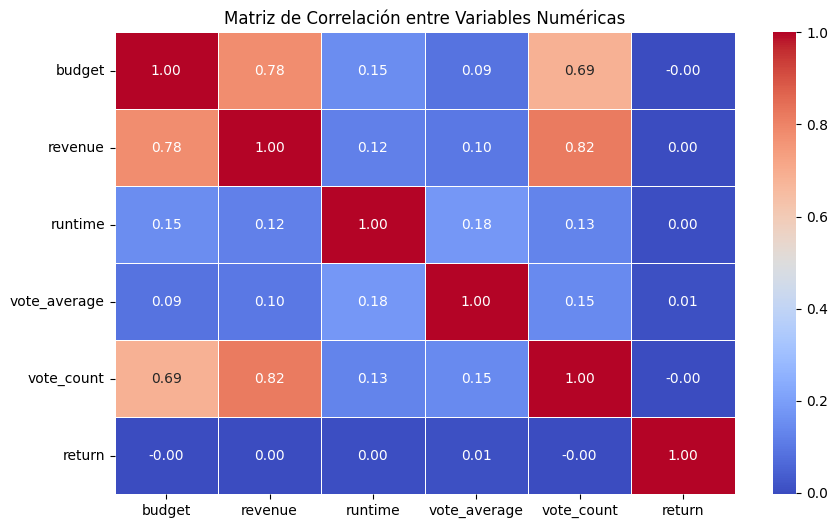

In [23]:
# Análisis de correlación entre variables numéricas

# Seleccionamos las columnas numéricas relevantes del dataset `movies`
num_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']
correlation_matrix = movies[num_columns].corr()

# Generamos el heatmap con matplotlib para visualizar la matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


### Interpretación de la Matriz de Correlación

La matriz de correlación muestra cómo se relacionan algunas de las variables principales del dataset:

- **`budget` y `revenue`**: Tienen una correlación alta (0.78). Esto sugiere que, generalmente, las películas con mayor presupuesto tienden a generar más ingresos.
- **`vote_count` con `revenue` y `budget`**: La cantidad de votos está fuertemente correlacionada con los ingresos (0.82) y el presupuesto (0.69). Es posible que las películas más populares o de mayor presupuesto atraigan más votantes.
- **`runtime` y `vote_average`**: Tienen baja correlación con las demás variables, indicando que la duración y el promedio de votos no están tan influenciados por el presupuesto o los ingresos.
- **`return`**: No tiene correlación significativa con ninguna variable, lo que sugiere que el retorno de inversión depende de factores adicionales, no reflejados en estas variables.

En resumen, este análisis sugiere que el éxito financiero y la popularidad están más asociados al presupuesto y la cantidad de votos que otros factores.



### Análisis de Frecuencia de Palabras en los Títulos de Películas

En esta etapa, realizaremos un análisis exploratorio de los títulos de las películas para identificar palabras comunes. Esto nos ayudará a comprender qué términos son más frecuentes, lo cual podría ser útil en el futuro para mejorar el sistema de recomendaciones. Vamos a usar una nube de palabras para que se aprecie bien claro y ademas quede atractivo


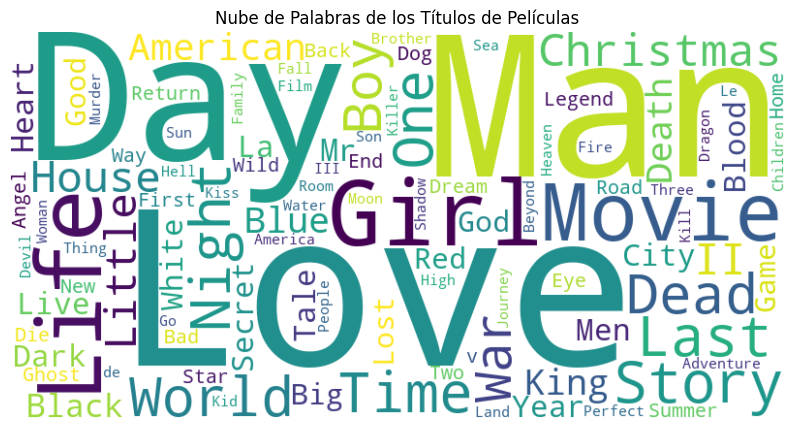

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenamos todos los títulos en una sola cadena de texto
all_titles = ' '.join(movies['title'].dropna().values)

# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(all_titles)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras de los Títulos de Películas")
plt.show()


La nube de palabras muestra las palabras más comunes en los títulos de películas en nuestro dataset. Términos como "Day," "Man," "Love," "Life," "Story," y "Girl" son muy frecuentes, lo que refleja temas universales y populares en el cine, como la vida, el amor y las relaciones humanas.

Esta información es útil para el sistema de recomendación, ya que nos permite identificar patrones y agrupar películas con títulos o temáticas similares, facilitando recomendaciones que puedan coincidir con los intereses del usuario.



### Análisis de Outliers en la Duración de las Películas

En esta sección, exploraremos la variable `runtime` (duración) de las películas para identificar posibles outliers. Los outliers en esta variable pueden representar películas extremadamente largas que se salen del rango típico de duración. Para facilitar la identificación visual, hemos limitado el rango de duración a 1000 minutos en el gráfico y consideramos outliers a aquellas películas con una duración mayor a 300 minutos.



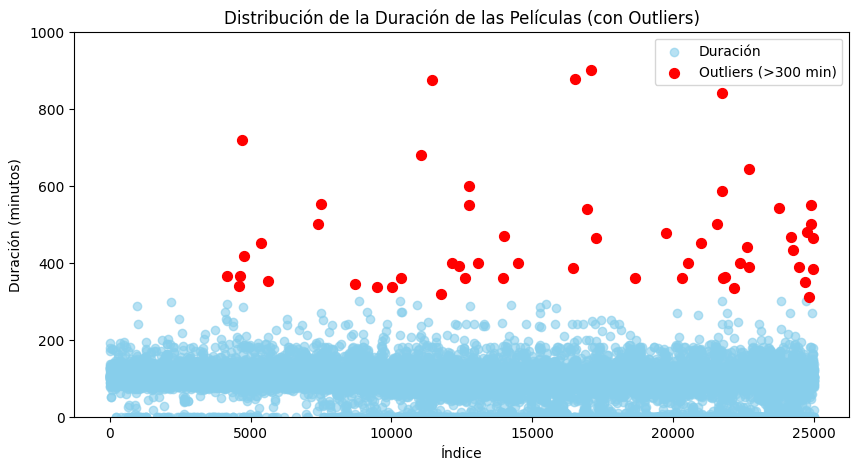

In [ ]:
import matplotlib.pyplot as plt

# Creo una copia de los datos sin valores nulos en 'runtime'
runtime_data = movies['runtime'].dropna()

# Configuramos el gráfico
plt.figure(figsize=(10, 5))
plt.scatter(runtime_data.index, runtime_data, color="skyblue", label="Duración", alpha=0.6)
outliers = runtime_data[runtime_data > 300]  # Definir outliers como duraciones mayores a 300 minutos
plt.scatter(outliers.index, outliers, color="red", label="Outliers (>300 min)", s=50)

# Ajustes de estilo
plt.title("Distribución de la Duración de las Películas (con Outliers)")
plt.xlabel("Índice")
plt.ylabel("Duración (minutos)")
plt.legend()
plt.ylim(0, 1000)  # Limito la escala para un rango visual claro
plt.show()



### Interpretación de los Resultados

El gráfico muestra una clara agrupación de películas con duraciones típicas (en celeste), mientras que los puntos rojos resaltan las películas que superan los 300 minutos, consideradas outliers. Estos outliers podrían corresponder a contenido especial, como series documentales o versiones extendidas. Limitar el rango en el gráfico nos permite observar estos valores atípicos de forma clara y fácil de interpretar.


## 4) Transformación de Datos



En esta etapa, vamos a preparar ciertas columnas de nuestros datasets para que estén en un formato adecuado para el análisis y el modelo de recomendación. Las columnas en las que nos enfocaremos (`genres`, `cast_names`, y `production_companies`) contienen listas de información sobre géneros, elenco y compañías de producción de cada película, que son datos importantes para identificar similitudes entre películas.

#### Objetivo de la transformación:
1. **Estandarizar el formato** de estas columnas, asegurándonos de que cada entrada sea una lista que represente la información específica de cada película (géneros, elenco, compañías de producción).
2. **Manejar valores nulos** llenando los datos faltantes con un valor que indique que no hay información disponible.
3. **Optimizar las columnas** para facilitar el análisis posterior y la creación de vectores de similitud, en los que cada elemento de las listas pueda contribuir a medir la relación entre diferentes películas.

#### Pasos:
- Convertiremos los valores nulos en cada columna a `'Unknown'` para evitar problemas en el análisis.
- Transformaremos los valores en strings (si están en formato de lista) y eliminaremos espacios en blanco innecesarios.
- Separaremos cada entrada por comas para convertirla en una lista y que esté lista para el análisis de similitud en el modelo.

Este proceso nos permitirá tener datos más estructurados y listos para su uso en la creación de un sistema de recomendación basado en similitudes de contenido.


In [ ]:
# Paso 1: Convertimos todos los valores de la columna 'genres' a strings, asegurando consistencia
movies['genres'] = movies['genres'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))

# Paso 2: Reemplazamos espacios en blanco y luego dividir los géneros en listas
movies['genres'] = movies['genres'].str.replace(" ", "").str.split(',')

# Repito el proceso para 'cast_names' y 'production_companies'

# Para 'cast_names' en el dataset 'credits'
credits['cast_names'] = credits['cast_names'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))
credits['cast_names'] = credits['cast_names'].str.replace(" ", "").str.split(',')

# Para 'production_companies' en el dataset 'movies'
movies['production_companies'] = movies['production_companies'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))
movies['production_companies'] = movies['production_companies'].str.replace(" ", "").str.split(',')

# vemos las primeras filas para verificar los cambios
print("Primera fila de la columna 'genres':", movies['genres'].head(1).values)
print("Primera fila de la columna 'cast_names':", credits['cast_names'].head(1).values)
print("Primera fila de la columna 'production_companies':", movies['production_companies'].head(1).values)


Primera fila de la columna 'genres': [list(['Animation', 'Comedy', 'Family'])]
Primera fila de la columna 'cast_names': [list(['TomHanks', 'TimAllen', 'DonRickles', 'JimVarney', 'WallaceShawn', 'JohnRatzenberger', 'AnniePotts', 'JohnMorris', 'ErikvonDetten', 'LaurieMetcalf', 'R.LeeErmey', 'SarahFreeman', 'PennJillette'])]
Primera fila de la columna 'production_companies': [list(['PixarAnimationStudios'])]
